In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,classification_report
from sklearn.model_selection import train_test_split
import scipy.stats as ss
from jupyter_dash import JupyterDash
from dash import html, dash_table ,Dash
from dash import dcc
from dash.dependencies import Input, Output
import dash_bootstrap_components as dbc
from dash_bootstrap_templates import load_figure_template
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
import xgboost
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

In [2]:
dataset=pd.read_csv('Job_placement_Data.csv')

In [3]:
dataset.head()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [4]:
dataset=dataset.drop(columns=['ssc_board','hsc_board'])

In [5]:
dataset.shape

(215, 11)

In [6]:
dataset.isna().sum()

gender                 0
ssc_percentage         0
hsc_percentage         0
hsc_subject            0
degree_percentage      0
undergrad_degree       0
work_experience        0
emp_test_percentage    0
specialisation         0
mba_percent            0
status                 0
dtype: int64

In [7]:
dataset.duplicated().sum()

0

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               215 non-null    object 
 1   ssc_percentage       215 non-null    float64
 2   hsc_percentage       215 non-null    float64
 3   hsc_subject          215 non-null    object 
 4   degree_percentage    215 non-null    float64
 5   undergrad_degree     215 non-null    object 
 6   work_experience      215 non-null    object 
 7   emp_test_percentage  215 non-null    float64
 8   specialisation       215 non-null    object 
 9   mba_percent          215 non-null    float64
 10  status               215 non-null    object 
dtypes: float64(5), object(6)
memory usage: 18.6+ KB


In [9]:
for i in ['status','specialisation','work_experience','undergrad_degree','hsc_subject','gender']:
    print('column ',i,' : ',dataset[i].unique())

column  status  :  ['Placed' 'Not Placed']
column  specialisation  :  ['Mkt&HR' 'Mkt&Fin']
column  work_experience  :  ['No' 'Yes']
column  undergrad_degree  :  ['Sci&Tech' 'Comm&Mgmt' 'Others']
column  hsc_subject  :  ['Commerce' 'Science' 'Arts']
column  gender  :  ['M' 'F']


In [10]:
dataset.describe()

,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent
count,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186
std,10.827205,10.897509,7.358743,13.275956,5.833385
min,40.890000,37.000000,50.000000,50.000000,51.210000
25%,60.600000,60.900000,61.000000,60.000000,57.945000
50%,67.000000,65.000000,66.000000,71.000000,62.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000
max,89.400000,97.700000,91.000000,98.000000,77.890000


In [11]:
dataset.corr(numeric_only=True)

,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent
ssc_percentage,1.000000,0.511472,0.538404,0.261993,0.388478
hsc_percentage,0.511472,1.000000,0.434206,0.245113,0.354823
degree_percentage,0.538404,0.434206,1.000000,0.224470,0.402364
emp_test_percentage,0.261993,0.245113,0.224470,1.000000,0.218055
mba_percent,0.388478,0.354823,0.402364,0.218055,1.000000


In [12]:
status=dataset['status']
for i in ['specialisation','work_experience','undergrad_degree','hsc_subject','gender']:
    col=dataset[i]
    print(f'status and ',i,'correlation : {0:1.5f}'.format(ss.chi2_contingency(pd.crosstab(status, col))[1]))

status and  specialisation correlation : 0.00042
status and  work_experience correlation : 0.00010
status and  undergrad_degree correlation : 0.22661
status and  hsc_subject correlation : 0.57271
status and  gender correlation : 0.23980


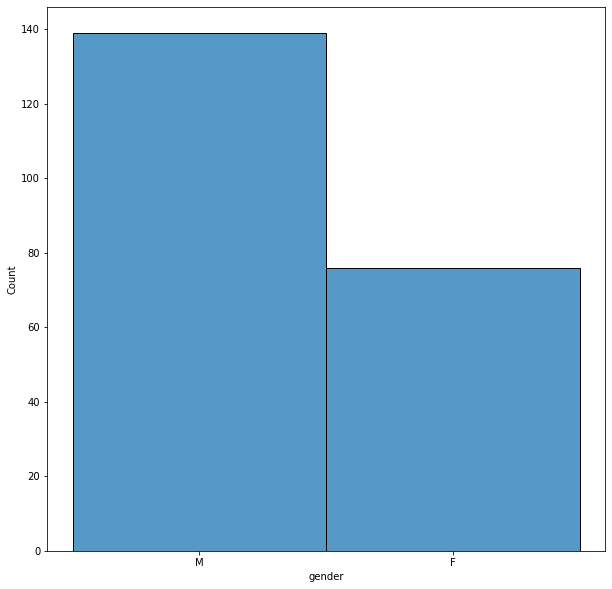

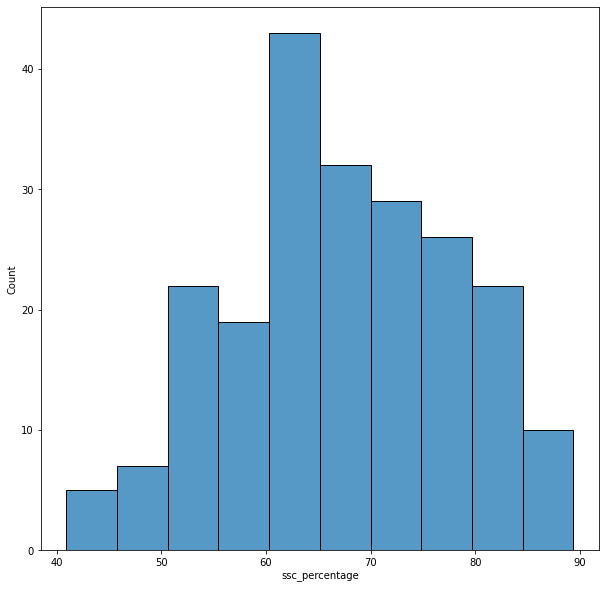

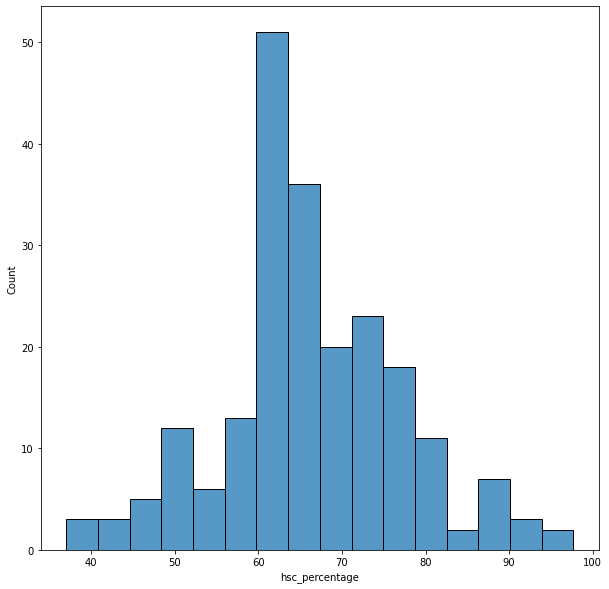

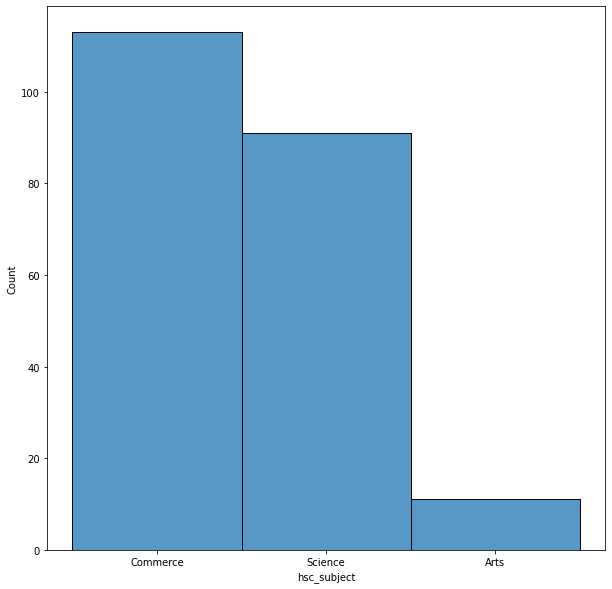

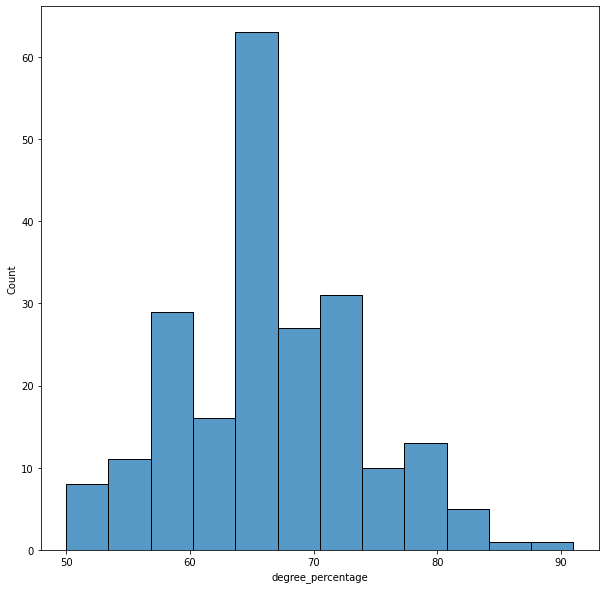

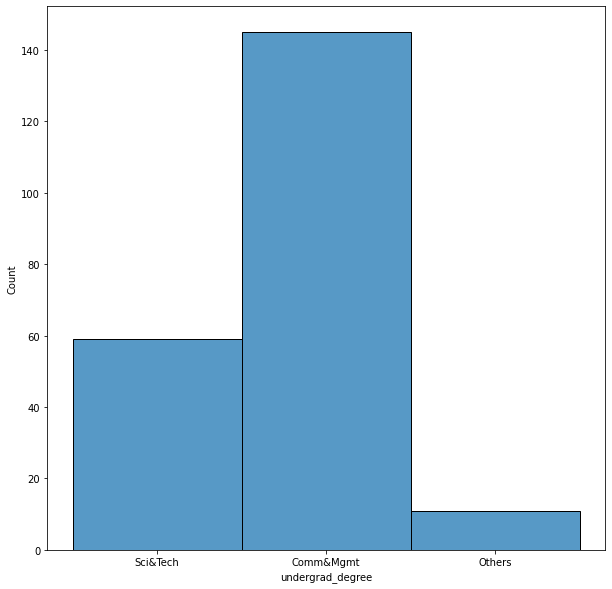

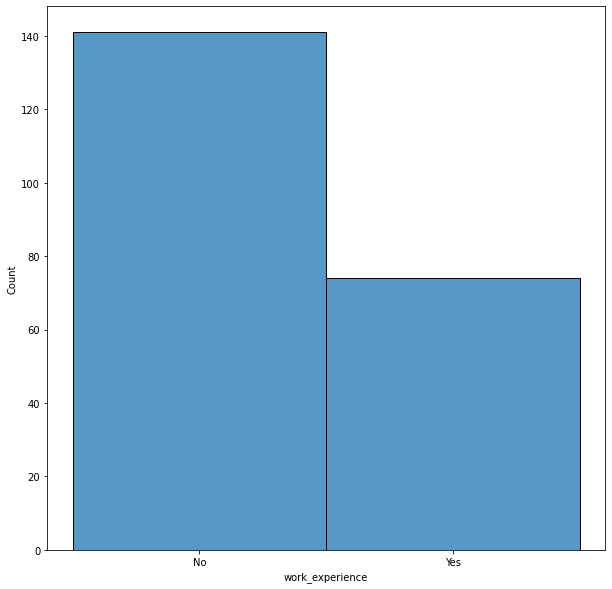

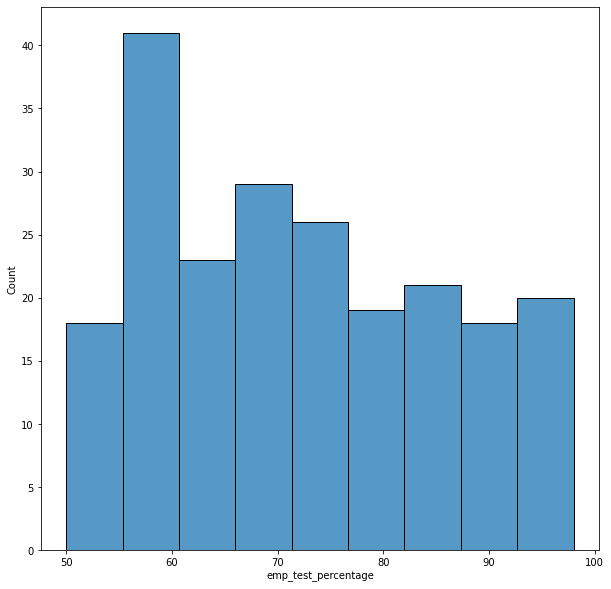

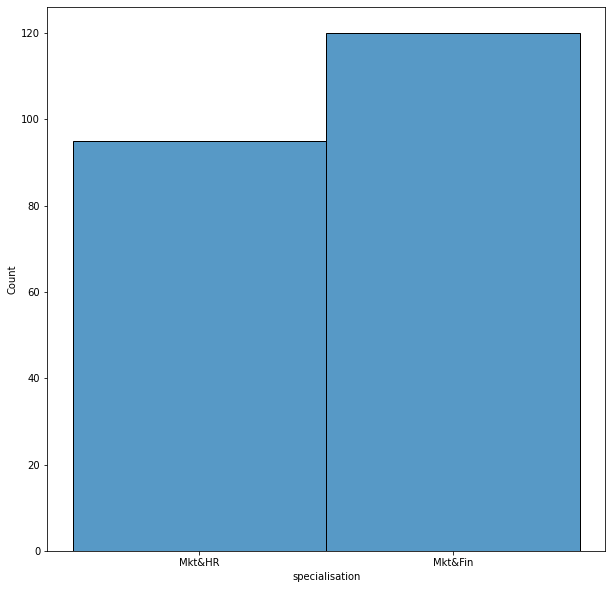

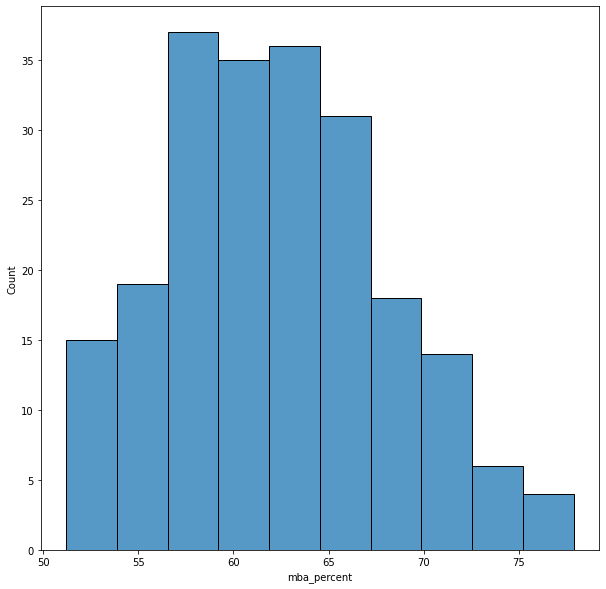

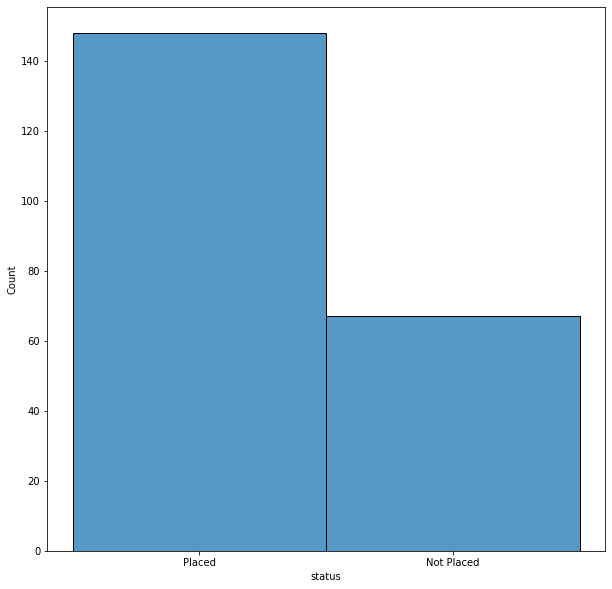

In [13]:
for i,c in enumerate(dataset.columns):
    plt.figure(figsize=(10,10))
    sns.histplot(dataset,x=c)


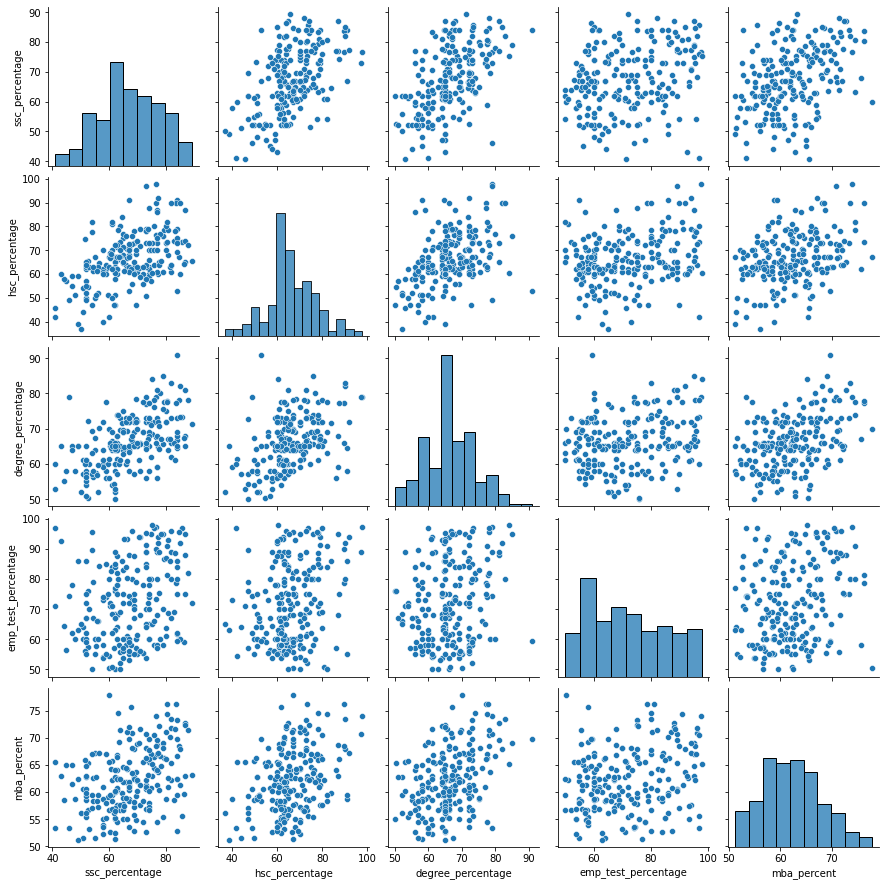

In [14]:
sns.pairplot(dataset);

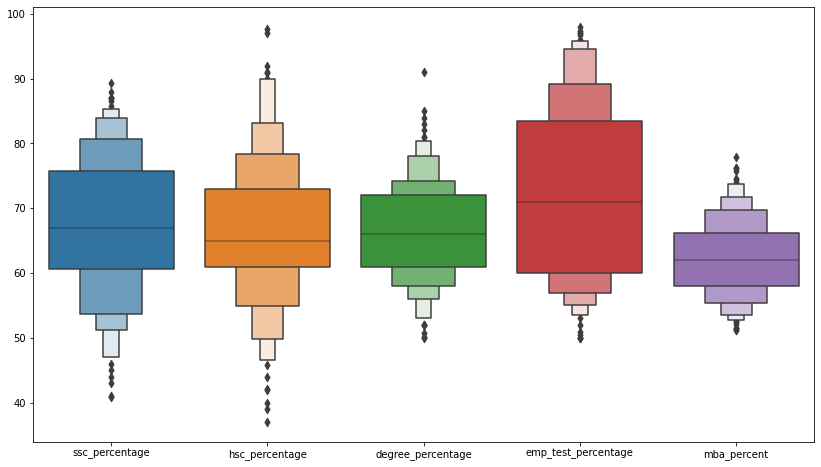

In [15]:
plt.figure(figsize=(14,8))
sns.boxenplot(data=dataset);

In [16]:
X = dataset.drop(columns='status',axis=1)
y = dataset['status']

# Machine learning

### Feature engineering

In [17]:
# Split the dataset into Train and Test sets with test_size=20% and random_state=25.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

In [18]:
X_test.head()# 20%

,gender,ssc_percentage,hsc_percentage,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent
43,M,87.0,87.00,Commerce,68.0,Comm&Mgmt,No,95.00,Mkt&HR,62.90
180,M,65.0,71.50,Commerce,62.8,Comm&Mgmt,Yes,57.00,Mkt&Fin,56.60
34,M,62.0,51.00,Science,52.0,Others,No,68.44,Mkt&HR,62.77
41,F,74.0,63.16,Commerce,65.0,Comm&Mgmt,Yes,65.00,Mkt&HR,69.76
157,M,66.5,62.50,Commerce,60.9,Comm&Mgmt,No,93.40,Mkt&Fin,55.03


In [19]:
X_train.head()# 80%

,gender,ssc_percentage,hsc_percentage,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent
185,F,88.00,72.0,Science,78.0,Others,No,82.00,Mkt&HR,71.43
207,M,83.33,78.0,Commerce,61.0,Comm&Mgmt,Yes,88.56,Mkt&Fin,71.55
102,F,77.00,61.0,Commerce,68.0,Comm&Mgmt,Yes,57.50,Mkt&Fin,61.31
56,M,63.00,71.4,Commerce,61.4,Comm&Mgmt,No,68.00,Mkt&Fin,66.88
113,F,73.96,79.0,Commerce,67.0,Comm&Mgmt,No,72.15,Mkt&Fin,63.08


In [20]:
# select all categorical variables
dataset_categorical = dataset.select_dtypes(include=['object'])
dataset_categorical.head()

,gender,hsc_subject,undergrad_degree,work_experience,specialisation,status
0,M,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,M,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,M,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,M,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,M,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed


In [21]:
# Apply Label encoder to dataset_categorical
label_encoder = LabelEncoder()
dataset_categorical = dataset_categorical.apply(label_encoder.fit_transform)
dataset_categorical.head()

,gender,hsc_subject,undergrad_degree,work_experience,specialisation,status
0,1,1,2,0,1,1
1,1,2,2,1,0,1
2,1,0,0,0,0,1
3,1,2,2,0,1,0
4,1,1,0,0,0,1


In [22]:
# Concat dataset_categorical with original df
df = dataset.drop(dataset_categorical.columns, axis=1)# drop categorical
df = pd.concat([df, dataset_categorical], axis=1)# concat for dataframe
df.head()

,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent,gender,hsc_subject,undergrad_degree,work_experience,specialisation,status
0,67.00,91.00,58.00,55.0,58.80,1,1,2,0,1,1
1,79.33,78.33,77.48,86.5,66.28,1,2,2,1,0,1
2,65.00,68.00,64.00,75.0,57.80,1,0,0,0,0,1
3,56.00,52.00,52.00,66.0,59.43,1,2,2,0,1,0
4,85.80,73.60,73.30,96.8,55.50,1,1,0,0,0,1


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ssc_percentage       215 non-null    float64
 1   hsc_percentage       215 non-null    float64
 2   degree_percentage    215 non-null    float64
 3   emp_test_percentage  215 non-null    float64
 4   mba_percent          215 non-null    float64
 5   gender               215 non-null    int32  
 6   hsc_subject          215 non-null    int32  
 7   undergrad_degree     215 non-null    int32  
 8   work_experience      215 non-null    int32  
 9   specialisation       215 non-null    int32  
 10  status               215 non-null    int32  
dtypes: float64(5), int32(6)
memory usage: 13.6 KB


In [24]:
# convert target variable status to categorical
df['status'] = df['status'].astype('category')
df['status'].head()

0    1
1    1
2    1
3    0
4    1
Name: status, dtype: category
Categories (2, int64): [0, 1]

In [25]:
df['status'].value_counts()

1    148
0     67
Name: status, dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ssc_percentage       215 non-null    float64 
 1   hsc_percentage       215 non-null    float64 
 2   degree_percentage    215 non-null    float64 
 3   emp_test_percentage  215 non-null    float64 
 4   mba_percent          215 non-null    float64 
 5   gender               215 non-null    int32   
 6   hsc_subject          215 non-null    int32   
 7   undergrad_degree     215 non-null    int32   
 8   work_experience      215 non-null    int32   
 9   specialisation       215 non-null    int32   
 10  status               215 non-null    category
dtypes: category(1), float64(5), int32(5)
memory usage: 13.1 KB


In [27]:
X = df.drop(columns='status',axis=1)
y = df['status']

### Decision tree without data scaler

In [28]:
dtc = DecisionTreeClassifier()
dtc

DecisionTreeClassifier()

In [29]:
# resplitting the data into train and test after Label encoding
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

In [30]:
# Train Decision Tree Classifer
dtc = dtc.fit(X_train,y_train)

In [31]:
predictions = dtc.predict(X_test)
Accuracy = accuracy_score(y_test, predictions)
print('The accuracy of Decision Tree is: ',Accuracy*100,'%')

The accuracy of Decision Tree is:  83.72093023255815 %


In [32]:
print(confusion_matrix(y_test,predictions))

[[10  4]
 [ 3 26]]


In [33]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74        14
           1       0.87      0.90      0.88        29

    accuracy                           0.84        43
   macro avg       0.82      0.81      0.81        43
weighted avg       0.83      0.84      0.84        43



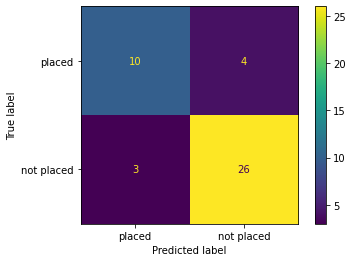

In [34]:
disp=ConfusionMatrixDisplay(confusion_matrix(y_test,predictions),display_labels=['placed','not placed'])  
disp.plot()
plt.show()

### Decision tree with data scaler

In [35]:
Scaler = StandardScaler()
Scaler

StandardScaler()

In [36]:
X =Scaler.fit_transform(X)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)
dtcS = DecisionTreeClassifier()
dtcS.fit(X_train,y_train)# Learning 
y_pred = dtcS.predict(X_test)# Predictions

In [38]:
predictions = dtcS.predict(X_test)
Accuracy = accuracy_score(y_test, predictions)
print('The accuracy of Decision Tree after standard scaler is: ',Accuracy*100,'%')

The accuracy of Decision Tree after standard scaler is:  79.06976744186046 %


In [39]:
print(confusion_matrix(y_test,predictions))

[[10  4]
 [ 5 24]]


In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.71      0.69        14
           1       0.86      0.83      0.84        29

    accuracy                           0.79        43
   macro avg       0.76      0.77      0.77        43
weighted avg       0.80      0.79      0.79        43



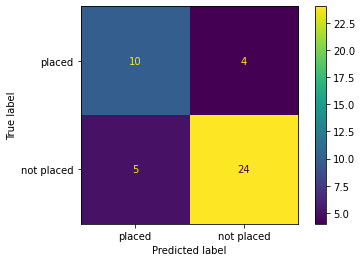

In [41]:
disp=ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=['placed','not placed'])  
disp.plot()
plt.show()

### Feature engineering

In [42]:
X

array([[-0.02808697,  2.2688123 , -1.14010225, ...,  1.57628354,
        -0.72444647,  1.12390297],
       [ 1.11336869,  1.10344799,  1.51326671, ...,  1.57628354,
         1.38036423, -0.88975652],
       [-0.21323793,  0.15331275, -0.32284282, ..., -0.67555009,
        -0.72444647, -0.88975652],
       ...,
       [-0.02808697,  0.06133451,  0.90304633, ..., -0.67555009,
         1.38036423, -0.88975652],
       [ 0.61994138, -0.03064373, -1.14010225, ..., -0.67555009,
        -0.72444647,  1.12390297],
       [-0.49096436, -0.76646966, -1.82115177, ..., -0.67555009,
        -0.72444647,  1.12390297]])

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)


In [44]:
X_train

array([[ 1.91599809,  0.52122572,  1.58409586, ...,  0.45036673,
        -0.72444647,  1.12390297],
       [ 1.4836706 ,  1.07309517, -0.73147253, ..., -0.67555009,
         1.38036423, -0.88975652],
       [ 0.89766782, -0.49053493,  0.2219968 , ..., -0.67555009,
         1.38036423, -0.88975652],
       ...,
       [ 0.95969339, -0.13273958,  0.58567725, ..., -0.67555009,
        -0.72444647, -0.88975652],
       [ 1.77713487, -0.19620456,  0.14027086, ...,  1.57628354,
        -0.72444647, -0.88975652],
       [-0.02808697,  0.15331275, -0.32284282, ..., -0.67555009,
         1.38036423,  1.12390297]])

### adaboosting 

In [45]:
adaboost = AdaBoostClassifier(n_estimators = 50, learning_rate = 0.2).fit(X_train, Y_train)
score = adaboost.score(X_test, Y_test)
score

0.9069767441860465

### XGboost

In [46]:
xgboost = XGBClassifier(n_estimators = 50, learning_rate = 0.2).fit(X_train, Y_train, early_stopping_rounds = 5, eval_set = [(X_test, Y_test)],verbose = False)
score_xgb = xgboost.score(X_test,Y_test)
score_xgb

0.8837209302325582

In [47]:
model = XGBClassifier(n_estimators = 5000, learning_rate = 0.2)
model.fit(X_train, Y_train,verbose = False)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=5000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [48]:
y_pred = model.predict(X_test)
prediction = [round(value) for value in y_pred ]

In [49]:
accuracy = accuracy_score( Y_test, prediction)
print('The accuracy of xgboost after standard scaler is: ',accuracy*100,'%')

The accuracy of xgboost after standard scaler is:  83.72093023255815 %


In [50]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.79      0.76        14
           1       0.89      0.86      0.88        29

    accuracy                           0.84        43
   macro avg       0.81      0.82      0.82        43
weighted avg       0.84      0.84      0.84        43



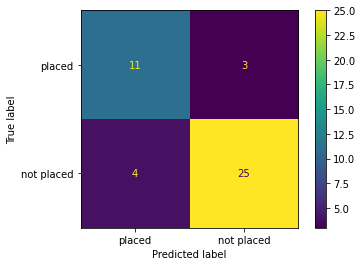

In [51]:
disp=ConfusionMatrixDisplay(confusion_matrix(Y_test,y_pred),display_labels=['placed','not placed'])  
disp.plot()
plt.show()

### Random forest

In [52]:
rm = RandomForestClassifier()
rm.fit(X_train,y_train)

RandomForestClassifier()

In [53]:
pred = rm.predict(X_test)

In [54]:
print(classification_report( Y_test,pred))
print(confusion_matrix(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80        14
           1       0.93      0.86      0.89        29

    accuracy                           0.86        43
   macro avg       0.84      0.86      0.85        43
weighted avg       0.87      0.86      0.86        43

[[11  3]
 [ 4 25]]


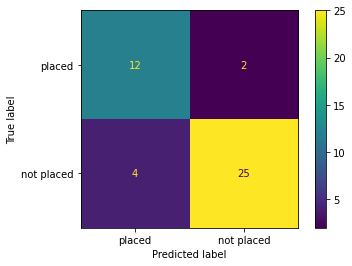

In [55]:
disp=ConfusionMatrixDisplay(confusion_matrix(Y_test,pred),display_labels=['placed','not placed'])  
disp.plot()
plt.show()

### naive bayes

In [56]:
X = df.drop(columns='status',axis=1)
y = df['status']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [57]:
nv =  MultinomialNB()
nv.fit(X_train,y_train)

MultinomialNB()

In [58]:
pred = nv.predict(X_test)

In [59]:
print(classification_report( y_test,pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.67      1.00      0.81        29

    accuracy                           0.67        43
   macro avg       0.34      0.50      0.40        43
weighted avg       0.45      0.67      0.54        43



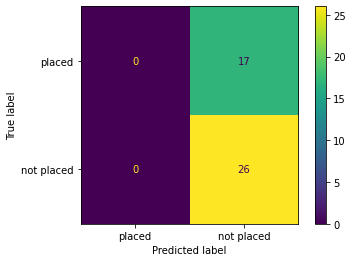

In [60]:
disp=ConfusionMatrixDisplay(confusion_matrix(Y_test,pred),display_labels=['placed','not placed'])  
disp.plot()
plt.show()

# Dash board

In [61]:
catagorical=dataset.select_dtypes(include=['object'])
encoder_dict = {}
for c in catagorical.columns:
    e = LabelEncoder()
    e.fit(catagorical[c])
    encoder_dict[c]=e
    print(encoder_dict[c].classes_,'---',c)

x = df.drop(columns='status',axis=1)
scaler = StandardScaler().fit(x)


['F' 'M'] --- gender
['Arts' 'Commerce' 'Science'] --- hsc_subject
['Comm&Mgmt' 'Others' 'Sci&Tech'] --- undergrad_degree
['No' 'Yes'] --- work_experience
['Mkt&Fin' 'Mkt&HR'] --- specialisation
['Not Placed' 'Placed'] --- status


In [62]:
X = df.drop(columns='status',axis=1)
y = df['status']

In [63]:
X = scaler.transform(X)

In [64]:
df

,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent,gender,hsc_subject,undergrad_degree,work_experience,specialisation,status
0,67.00,91.00,58.00,55.0,58.80,1,1,2,0,1,1
1,79.33,78.33,77.48,86.5,66.28,1,2,2,1,0,1
2,65.00,68.00,64.00,75.0,57.80,1,0,0,0,0,1
3,56.00,52.00,52.00,66.0,59.43,1,2,2,0,1,0
4,85.80,73.60,73.30,96.8,55.50,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
210,80.60,82.00,77.60,91.0,74.49,1,1,0,0,0,1
211,58.00,60.00,72.00,74.0,53.62,1,2,2,0,0,1
212,67.00,67.00,73.00,59.0,69.72,1,1,0,1,0,1
213,74.00,66.00,58.00,70.0,60.23,0,1,0,0,1,1


In [65]:
adaboost = AdaBoostClassifier(n_estimators = 50, learning_rate = 0.2)
adaboost.fit(X,y)

AdaBoostClassifier(learning_rate=0.2)

In [66]:
adaboost.predict_proba(X).shape

(215, 2)

In [67]:
app = JupyterDash(external_stylesheets=[dbc.themes.LUX])


app.layout = html.Div(
        children=[html.Center(html.H1('JOB PLACEMENT PREDICTION')),
        html.Div(children=[   
        
        html.Center(html.H3('What is your specialisation ?')),
        dcc.Dropdown(
            options=list(dataset['specialisation'].unique()),id='specialisation'),
            
        html.Center(html.H3('Do you have work experience ?')),
        dcc.Dropdown(
            options=list(dataset['work_experience'].unique()),id='work_experience'),
            
        html.Center(html.H3('Undergrad degree')),
        dcc.Dropdown(
            options=list(dataset['undergrad_degree'].unique()),id='undergrad_degree'),
            
        html.Center(html.H3('What is your high school subject ?')),
        dcc.Dropdown(
            options=list(dataset['hsc_subject'].unique()),id='hsc_subject'),
            
        html.Center(html.H3('What is your gender ?')),
        dcc.Dropdown(
            options=list(dataset['gender'].unique()),id='gender')],style={'hight':'100%','width':'50%','display': 'inline-block'}),
        
        html.Div(children=[
            
        html.Center(html.H3('What is your secondery school percentage ?')),    
        html.Center(dcc.Input(
            id='ssc_percentage',
            type='number',min=0, max=100, step=1)),
            
        html.Center(html.H3('What is your high school percentage ?')),    
        html.Center(dcc.Input(
            id='hsc_percentage',
            type='number',min=0, max=100, step=1)),
            
        html.Center(html.H3('What is your degree percentage ?')),    
        html.Center(dcc.Input(
            id='degree_percentage',
            type='number',min=0, max=100, step=1)),
            
        html.Center(html.H3('What is your aptitude test percentage ?')),    
        html.Center(dcc.Input(
            id='emp_test_percentage',
            type='number',min=0, max=100, step=1)),
            
        html.Center(html.H3('What is your MBA degree percentage ?')),    
        html.Center(dcc.Input(
            id='mba_percent',
            type='number',min=0, max=100, step=1))],style={'hight':'100%','width':'50%','display': 'inline-block'}),
        html.Center(html.Button('PREDICT', id='submit-val', n_clicks=0)),
        
        html.Div(id='container')
                 
        ],style={'backgroundColor': '#FFFDEC'})


@app.callback(
    Output('container', "children"),
    Input('specialisation', "value"),
    Input('work_experience', "value"),
    Input('undergrad_degree', "value"),
    Input('hsc_subject', "value"),
    Input('gender', "value"),
    Input('ssc_percentage', "value"),
    Input('hsc_percentage', "value"),
    Input('degree_percentage', "value"),
    Input('emp_test_percentage', "value"),
    Input('mba_percent', "value"),
    Input('submit-val','n_clicks'))
def update_table(specialisation,work_experience,undergrad_degree,hsc_subject,gender,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent,nclicks):
    if nclicks > 0:
        specialisation = list(encoder_dict['specialisation'].transform([specialisation]))
        work_experience = list(encoder_dict['work_experience'].transform([work_experience]))
        undergrad_degree = list(encoder_dict['undergrad_degree'].transform([undergrad_degree]))
        hsc_subject = list(encoder_dict['hsc_subject'].transform([hsc_subject]))
        gender = list(encoder_dict['gender'].transform([gender]))
        #ssc_percentage	hsc_percentage	degree_percentage	emp_test_percentage	mba_percent	gender	hsc_subject	undergrad_degree	work_experience	specialisation
        x =  [ssc_percentage] + [hsc_percentage]+  [degree_percentage] + [emp_test_percentage] + [mba_percent] + gender + hsc_subject + undergrad_degree + work_experience+ specialisation  
        x = scaler.transform([x])
    
        predict = adaboost.predict(x)[0]
        proba = adaboost.predict_proba(x)
    
        if predict == 1 :
            s='with probability of '+str(proba[0,predict]*100)+'%'
            return [html.Center(html.H2('Congratulation you will placed')),html.Center(html.H2(s)),html.Center(html.Img(src ='assets/win.gif'))]
        elif predict == 0:
            s='with probability of '+str(proba[0,predict]*100)+'%'
            return [html.Center(html.H2('You will not be placed')),html.Center(html.H2(s)),html.Center(html.Img(src ='assets/lose.png'))]
    else:
        return html.Div()

if __name__ == '__main__':
    app.run_server(debug=True)

Dash app running on http://127.0.0.1:8050/
